### 2021_10_28_4

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns      # seaborn은 matplotlib보다 간단하게 사용 가능
import os
for dirname, _, filenames in os.walk('../CSV/bike-sharing-demand/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../CSV/bike-sharing-demand/07_sub.csv
../CSV/bike-sharing-demand/.DS_Store
../CSV/bike-sharing-demand/sampleSubmission.csv
../CSV/bike-sharing-demand/06_sub.csv
../CSV/bike-sharing-demand/test.csv
../CSV/bike-sharing-demand/04_sub.csv
../CSV/bike-sharing-demand/05_sub.csv
../CSV/bike-sharing-demand/01_sub.csv
../CSV/bike-sharing-demand/08_sub.csv
../CSV/bike-sharing-demand/03_sub.csv
../CSV/bike-sharing-demand/train.csv
../CSV/bike-sharing-demand/02_sub.csv


In [2]:
train = pd.read_csv("../CSV/bike-sharing-demand/train.csv",parse_dates=['datetime'])
test = pd.read_csv("../CSV/bike-sharing-demand/test.csv",parse_dates=['datetime'])
sub = pd.read_csv("../CSV/bike-sharing-demand/sampleSubmission.csv")

print("train shape : {}".format(train.shape))
print("test shape : {}".format(test.shape))
print("sub shape : {}".format(sub.shape))

train shape : (10886, 12)
test shape : (6493, 9)
sub shape : (6493, 2)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
new_tr = train.copy()
new_test = test.copy()

## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek

new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

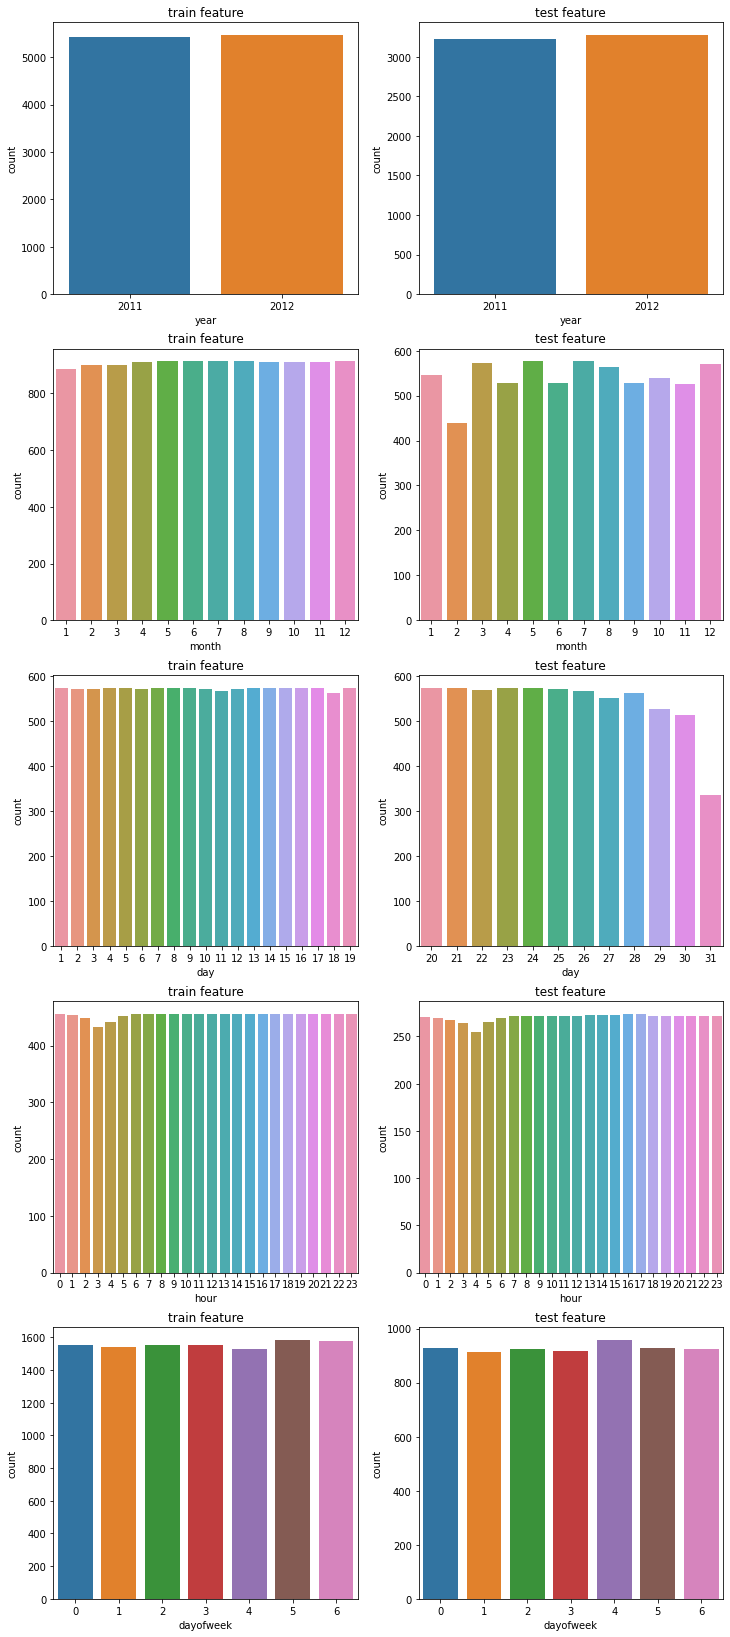

In [5]:
col_names = ['year','month','day','hour','dayofweek']
i = 0
plt.figure(figsize=(12,35))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
    i = i+1
    plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
    sns.countplot(x = name, data = new_tr)
    plt.title("train feature")

    i = i+1
    plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
    sns.countplot(x = name, data = new_test)
    plt.title("test feature")
plt.show()

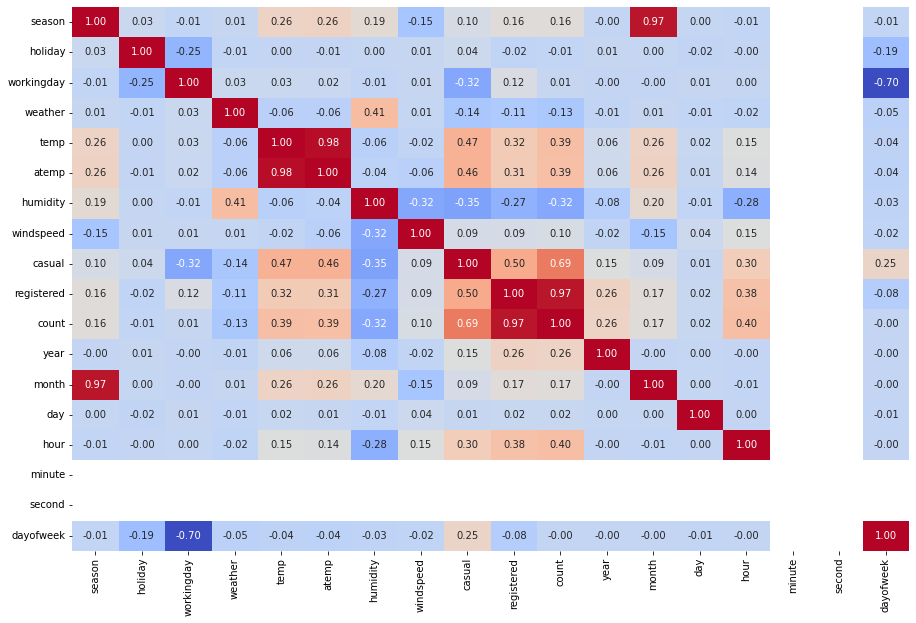

In [6]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
new_tr["log_count"] = np.log1p(new_tr["count"])

In [9]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

In [10]:
X = new_tr[feature_names]
y = new_tr["log_count"]

X_test_last = new_test[feature_names]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.1,
                                                   random_state = 77)


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import time

In [12]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

score = cross_val_score(model, X_test, y_test, cv = 5, 
                       scoring = "neg_mean_squared_error")
print("MSE 평균 :", np.abs(score.mean()))

MSE 평균 : 0.2056164774099639


In [13]:
def model_val(model_name, model_obj) :
    now_time = time.time()
    
    model_obj.fit(X_train, y_train)

    score = cross_val_score(model_obj, X_test, y_test, cv = 5, 
                           scoring = "neg_mean_squared_error")
    avg_score = np.abs(score.mean())
    print("MSE 평균 :", avg_score)
    
    pro_time = time.time() - now_time
    print("수행시간 : {:.3f}".format(pro_time))
    print("{} score : {}".format(model_name, avg_score))
    
    return avg_score, pro_time

In [14]:
model_list = ["RandomForestRegressor",  "xgb_basic", 
              "lightgbm-model1", "lightgbm-model2"]

exe_model = []
model_score = []
model_time = []

### RandomForestRegressor

In [15]:
m_name = model_list[0]

if m_name not in exe_model :
    model = RandomForestRegressor(random_state = 30)
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else :
    print(f"{m_name} 이미 실행 완료")

MSE 평균 : 0.20647408739670653
수행시간 : 3.663
RandomForestRegressor score : 0.20647408739670653


In [16]:
print(exe_model)

['RandomForestRegressor']


### xgboost

In [17]:
m_name = model_list[1]

if m_name not in exe_model :
    model = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
                learning_rate = 0.1,
                max_depth = 3, 
                alpha = 0.1, 
                n_estimators = 1000)
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else :
    print(f"{m_name} 이미 실행 완료")

[14:17:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

### lightgbm model 1

In [18]:
m_name = model_list[2]

if m_name not in exe_model :
    model = lgb.LGBMRegressor()
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else :
    print(f"{m_name} 이미 실행 완료")

MSE 평균 : 0.13556178088893847
수행시간 : 0.537
lightgbm-model1 score : 0.13556178088893847


### lightgbm model 2

In [20]:
m_name = model_list[3]

if m_name not in exe_model :
    hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.013227664889528229,
                   'min_child_samples': 20, 
                   'num_leaves': 56, 
                   'reg_alpha': 0.7543896477745794, 
                   'reg_lambda': 0.07152751159655985, 
                   'subsample_for_bin': 240000, 
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

    model = lgb.LGBMRegressor(**hyperparameters)
    mse_score, p_time = model_val(m_name, model)
    
    exe_model.append(m_name) # 실행 완료
    model_score.append(mse_score)
    model_time.append(p_time)
else :
    print(f"{m_name} 이미 실행 완료")

MSE 평균 : 0.12737087361518704
수행시간 : 9.366
lightgbm-model2 score : 0.12737087361518704


### 결과 확인

In [23]:
for i in range(len(exe_model)) :
    print("exe_model : {}".format(exe_model[i]))
    print("model_score : {}".format(model_score[i]))
    print("model_time : {}".format(model_time[i]))
    print()

exe_model : RandomForestRegressor
model_score : 0.20647408739670653
model_time : 3.663087844848633

exe_model : xgb_basic
model_score : 0.14208194689659023
model_time : 3.5158801078796387

exe_model : lightgbm-model1
model_score : 0.13556178088893847
model_time : 0.5368630886077881

exe_model : lightgbm-model2
model_score : 0.12737087361518704
model_time : 9.36645793914795



In [32]:
dict_dat = {"model" : exe_model, "score" : model_score, "time" : model_time}
df = pd.DataFrame(dict_dat)
df

,model,score,time
0,RandomForestRegressor,0.206474,3.663088
1,xgb_basic,0.142082,3.515880
2,lightgbm-model1,0.135562,0.536863
3,lightgbm-model2,0.127371,9.366458


### 결과 시각화

<AxesSubplot:xlabel='model', ylabel='time'>

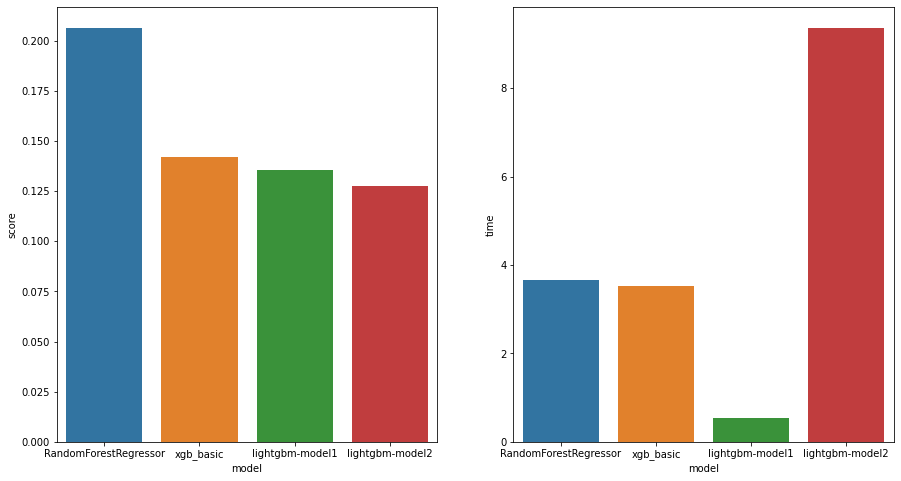

In [31]:
plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
sns.barplot(x = "model", y = "score", data = df)

plt.subplot(1, 2, 2)
sns.barplot(x = "model", y = "time", data = df)

### 최종 모델 선택 및 CSV 파일 생성

In [33]:
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.013227664889528229,
                   'min_child_samples': 20, 
                   'num_leaves': 56, 
                   'reg_alpha': 0.7543896477745794, 
                   'reg_lambda': 0.07152751159655985, 
                   'subsample_for_bin': 240000, 
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

# 최종 모델 선택 및 제출
m_lgbm2 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm2.fit(X_train, y_train)

pred = m_lgbm2.predict(X_test_last)
sub['count'] = np.expm1(pred)
sub.to_csv("../CSV/bike-sharing-demand/09_sub.csv", index = False)